In [1]:
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
sc.settings.verbosity = 2
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from readcount_tools import PAPER_CONTEXT, PAGEWIDTH_IN, POINTSIZE_HIGHLIGHT,POINTSIZE_SMALL,SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE,LINEWIDTH,POINTSIZE,TICKLENGTH,LEGEND_FONTSIZE,SPINEWIDTH,LETTER_LOC_X,LETTER_LOC_Y
from readcount_tools import get_tag

In [3]:
#load
adata_qumis = anndata.read_h5ad('data/tasic/qumi_census_comparion/adata_qumis_processed.h5ad')
adata_census = anndata.read_h5ad('data/tasic/qumi_census_comparion/adata_census_processed.h5ad')
adata_readcounts = anndata.read_h5ad('data/tasic/qumi_census_comparion/adata_readcounts_processed.h5ad')

tcmalloc: large alloc 1545330688 bytes == 0x5990000 @ 
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
tcmalloc: large alloc 1545330688 bytes == 0xe94fc000 @ 
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
tcmalloc: large alloc 1545330688 bytes == 0x1a9c10000 @ 
tcmalloc: large alloc 4811

In [4]:
print(adata_qumis.shape)
print(adata_census.shape)
print(adata_readcounts.shape)

(23822, 25248)
(23822, 25248)
(23822, 25248)


In [5]:
#adjust varnames/obsnames
adata_readcounts.var['residual_variances'] = adata_readcounts.var['pr_theta100_alpha50.0_var']
adata_readcounts.obsm['tsne'] = adata_readcounts.obsm['tsne_pr_theta100_alpha50.0']

In [6]:
n_hvgs=3000

In [7]:
def mean_resvar_plot(ax,adata,label,ylabel,xlims,ylims,hlinetext=False):
    
    resvar_cutoff = np.sort(adata.var['residual_variances'])[-n_hvgs]

    ax.scatter(x=adata.var['means'],y=adata.var['residual_variances'],lw=0,s=POINTSIZE_SMALL,rasterized=True)
    ax.scatter(x=adata.var['means'][adata.var['marker_idx']],
               y=adata.var['residual_variances'][adata.var['marker_idx']],
               lw=1,c='tab:red',s=5,label='Marker genes',rasterized=True)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_yticks([1,100])
    
    ax.hlines(resvar_cutoff,xlims[0],xlims[1],color='tab:red',linestyle=':',lw=LINEWIDTH)
    if hlinetext:
        ax.text(xlims[0]*1.3,resvar_cutoff*1.4,f'   {n_hvgs}\nHVG-cutoff',fontsize=LEGEND_FONTSIZE,c='tab:red')
        ax.set_ylabel('Residual variance')
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.despine()
    ax.set_title(label)
    ax.set_xlabel(ylabel)
    
    

In [8]:
def plot_tsne(ax,adata,label):
    ax.scatter(*adata.obsm['tsne'].T,linewidth=0,s=POINTSIZE,c=adata.obs['clustercolor'],rasterized=True)
    ax.axis('off')
    ax.set_aspect('equal')

### Figure S7

/tmp/ipykernel_28765/1248326064.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


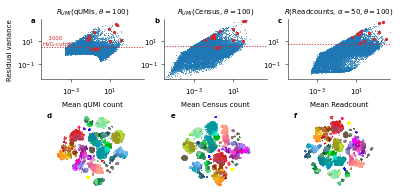

In [9]:
ncols = 3
nrows = 2
panelsize_tsne_in = PAGEWIDTH_IN/ncols
panelheight_resvar_in = panelsize_tsne_in/2
figheight_in = panelsize_tsne_in + panelheight_resvar_in

path='figures/S_tasic_qumi_census.pdf'

with mpl.rc_context(PAPER_CONTEXT):

    fig = plt.figure(figsize=(PAGEWIDTH_IN,figheight_in))

    nrows_grid = 11
    ncols_grid = 3
    axes_resvar = [plt.subplot2grid(shape=(nrows_grid,ncols_grid), loc=(0, col),          colspan=1,rowspan=4) for col in range(ncols_grid)]
    axes_tsne = [plt.subplot2grid(shape=(nrows_grid,ncols_grid), loc=(6, col),          colspan=1,rowspan=5) for col in range(ncols_grid)]

    adatas=[adata_qumis,adata_census, adata_readcounts,]

    xlims = [np.min([np.min(ad.var['means']) for ad in adatas]),
             np.max([np.max(ad.var['means']) for ad in adatas])]
    ylims = [np.min([np.min(ad.var['residual_variances']) for ad in adatas]),
             1.25*np.max([np.max(ad.var['residual_variances']) for ad in adatas])]

    labels=[r'$R_{UMI}$(qUMIs, $\theta=100$)',r'$R_{UMI}$(Census, $\theta=100$)',r'$R$(Readcounts, $\alpha=50, \theta=100$)']
    ylabels=['Mean qUMI count', 'Mean Census count', 'Mean Readcount']
    for i,(ax,adata,label,ylabel) in enumerate(zip(axes_resvar, adatas, labels, ylabels)):
        if i==0:
            hlinetext=True
        else:
            hlinetext=False
        mean_resvar_plot(ax,adata,label,ylabel,xlims=xlims,ylims=ylims,hlinetext=hlinetext)    
    for i,(ax,adata,label) in enumerate(zip(axes_tsne, adatas, labels)):
        plot_tsne(ax,adata,label)
    
    
    for ax in axes_resvar:
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(SPINEWIDTH)
    
    letters=['a','b','c',
             'd','e','f']
    for ax,letter, in zip(np.concatenate((axes_resvar, axes_tsne)),letters):
        ax.text(LETTER_LOC_X+0.2,LETTER_LOC_Y+0,letter,transform=ax.transAxes,fontweight='bold')

    plt.tight_layout()
    fig.savefig(path, dpi=300, format=None, bbox_inches = 'tight', pad_inches = 0)